# EE 596 RECOMMENDER SYSTEMS AT SCALE
## Assignment 1: 
- Libraries in python and Basic linear algebra (50pts)
- Intro coding problem in machine learning (25pts)

Author: Jinlin Xiang, Karthik Mohan

NumPy is a Python library and a very popular choice when one needs to work with linear algebra objects like matrices and vectors. We will be using numpy throughout the class.

If you have never used NumPy then I would highly recommend you going through this tutorial first:

https://numpy.org/doc/stable/user/quickstart.html

I also wanted to use this homework to remind you about the importance of dimensions in NumPy. For instance, suppose I have two matrices:

## 1.Basic Linear algebra

In [2]:
import numpy as np

In [3]:
A = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

B = 2*np.eye(3)

In [4]:
B

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

If we try to multiply them as-is we will get an error, correct this one:

In [5]:
# TODO
# A.dot(B)
B.dot(A)

array([[ 2.,  4.],
       [ 6.,  8.],
       [10., 12.]])

It gets less obvious when it comes to vectors, mainly because NumPy vectors are one-dimensional objects of shape (N,) which is different from column vectors -- 2-d matrices of shape (N, 1) -- or row-vectors -- 2-d matrices of shape (1, N). This difference may seem natural to people with background in C or Java (1d vs 2d arrays), but might seem counter-intuitive for people with MATLAB background, where all vectors and matrices are 2d by default.

### 1.1 Calcluate the fucntion:
As a basic NumPy proficiency test on translating math expression to NumPy syntax, calculate the following expression: 

$C = \log\det(B^Tvv^TB + B^TB*B^TB)$

Where $B = (1, 2; 3, 4; 5, 6)$, $v$ is a vector of ones, and $*$ is an element-wise product. Use NumPy functions for the logarithm (`np.log`) and determinant (`np.linalg.det`) 

In [6]:
v = np.array([[1],[1],[1]])

B = np.array([
    [1, 2],
    [3, 4], 
    [5, 6]
])

## TODO:
C = 0 #  place your answer here
C = np.log(np.linalg.det(B.T.dot(v).dot(v.T).dot(B) + B.T.dot(B).dot(B.T.dot(B))))
print(C)

7.454719949362746


### 1.2 Calcluate the gradients $\nabla_x f(x,y)$ (25pts)
For possibly non-symmetric $A, B \in R^{n \times n}$ and $c \in R$, let $f(x, y) = x^\top{A} x + y^\top{B} x + c$.

hint: $\nabla_x (x^TAx) = 2Ax$ $\nabla_x (y^Tx) = y$

- Using native Python implement the summation form.
- Using NumPy implement the vector form.

In [7]:
import time

# Import typing support
from typing import List

import matplotlib.pyplot as plt
import numpy as np

Vector = List[float]
Matrix = List[Vector]


def vanilla_matmul(A: Matrix, x: Vector) -> Vector:
    """Performs a matrix multiplications Ax on vanilla python lists.

    Args:
        A (Matrix): a (n, d) matrix.
        x (Vector): a (d,) vector.

    Returns:
        Vector: a resulting (n,) vector.

    Note:
        In this problem specifically d = n, since A and B are square matrices.
    """
    result: Vector = []
    for a in A:
        result_a = 0.0
        for a_i, x_i in zip(a, x):
            result_a += a_i * x_i
        result.append(result_a)
    return result


def vanilla_transpose(A: Matrix) -> Matrix:
    """Performs a matrix transpose

    Args:
        A (Matrix): a (n, d) matrix.

    Returns:
        Matrix: a resulting (d, n) matrix.
    """
    result: Matrix = [[] for _ in A[0]]  # Create list of d lists
    for a in A:
        for jdx, value in enumerate(a):
            result[jdx].append(value)
    return result


def vanilla_solution(x: Vector, y: Vector, A: Matrix, B: Matrix) -> Vector:
    """Calculates gradient of f(x, y) with respect to x using vanilla python lists.
    Where $$f(x, y) = x^T A x + y^T B x + c$$

    Args:
        x (Vector): a (n,) vector.
        y (Vector): a (n,) vector.
        A (Matrix): a (n, n) matrix.
        B (Matrix): a (n, n) matrix.

    Returns:
        Vector: a resulting (n,) vector.

    Note:
        - We provided you with `vanilla_transpose` and `vanilla_matmul` functions which you should use.
        - In this context (and documentation of two functions above) vector means list of floats,
            and matrix means list of lists of floats
    """
    # raise NotImplementedError("Your Code Goes Here")

    part1 = [element * 2 for element in vanilla_matmul(A, x)]
    part2 = vanilla_matmul(vanilla_transpose(B), y)

    for i in range(len(part1)):
        part1[i] = part1[i] + part2[i]
        
    return part1
    

def numpy_solution(
    x: np.ndarray, y: np.ndarray, A: np.ndarray, B: np.ndarray
) -> np.ndarray:
    """Calculates gradient of f(x, y) with respect to x using numpy arrays.
    Where $$f(x, y) = x^T A x + y^T B x + c$$

    Args:
        x (np.ndarray): a (n,) numpy array.
        y (np.ndarray): a (n,) numpy array.
        A (np.ndarray): a (n, n) numpy array.
        B (np.ndarray): a (n, n) numpy array.

    Returns:
        np.ndarray: a resulting (n, ) numpy array.

    Note:
    """
    # raise NotImplementedError("Your Code Goes Here")

    return 2 * A.dot(x) + np.transpose(y.T.dot(B))





In [8]:
RNG = np.random.RandomState(seed=446)

ns = [20, 200, 500, 1000]
vanilla_times = []
numpy_times = []

for n in ns:
    # Generate some data
    x = RNG.randn(n)
    y = RNG.randn(n)
    A = RNG.randn(n, n)
    B = RNG.randn(n, n)
    # And their vanilla List equivalents
    x_list = x.tolist()
    y_list = y.tolist()
    A_list = A.tolist()
    B_list = B.tolist()

    start = time.time_ns()
    vanilla_result = vanilla_solution(x_list, y_list, A_list, B_list,)
    # print(vanilla_result)
    vanilla_time = time.time_ns() - start
    start = time.time_ns()
    numpy_result = numpy_solution(x, y, A, B)
    # print(numpy_result)
    numpy_time = time.time_ns() - start

    np.testing.assert_almost_equal(vanilla_result, numpy_result)

    print(f"Time for vanilla implementation: {vanilla_time / 1e6}ms")
    print(f"Time for numpy implementation: {numpy_time / 1e6}ms")

    vanilla_times.append(vanilla_time)
    numpy_times.append(numpy_time)

Time for vanilla implementation: 0.099ms
Time for numpy implementation: 0.359ms
Time for vanilla implementation: 7.898ms
Time for numpy implementation: 3.015ms
Time for vanilla implementation: 48.83ms
Time for numpy implementation: 0.515ms
Time for vanilla implementation: 201.091ms
Time for numpy implementation: 1.435ms


# 2.Intro coding preoblem in machine learning

## 2.1 Thumbnail generator function (25pts)
Create a function create_thumbnail() which takes an RGB image as an input, and outputs the downsampled RGB image according to given compression rate 

#### The function should accept following parameters
- image – 3D array corresponding to input image
- downsampling_rate - an integer corresponding to the ratio between dimensions of original vs downsampled image. e.g. 10,
5, 3.
- Test your function against a provided color image with following downsampling rate: 5x, 10x, 20x. Save your outputs as e2_output1.png, e2_output2.png, e2_output3.png.

## hint: https://www.quora.com/What-is-a-downsampling-layer-in-Convolutional-Neural-Network-CNN

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image 


e2_img = mpimg.imread('sample_image_2.jpg')
e2_img = np.array(e2_img)   

In [10]:
e2_img.shape
print(e2_img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [255 254 252]]

 [[255 254 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [255 254 252]]]


In [11]:
# def test(image):
#     rate = 10

#     m_image, n_image, k_image = image.shape
#     print(m_image)
#     m_down = int(np.ceil(m_image/rate))
#     n_down = int(np.ceil(n_image/rate))

#     output_image = np.zeros((m_down, n_down, k_image), dtype=np.int16)

#     for k in range(k_image):
#         for x in range(m_down):
#             for y in range(n_down):
#                 sample_matrix = image[x*rate : min(x*rate+rate, m_image), y*rate : min(y*rate+rate, n_image), k]
#                 # print(sample_matrix)
#                 output_image[x,y,k] = int(np.average(sample_matrix))
#     return output_image

# output_image = test(e2_img)

# fig = plt.figure(figsize=(7, 7))
# plt.imshow(output_image)


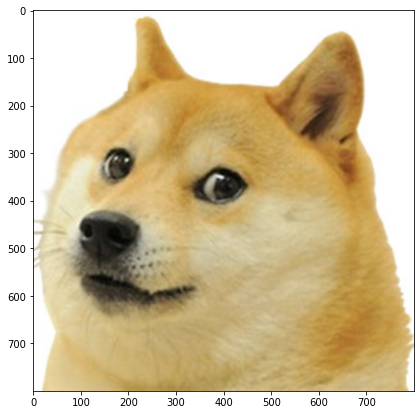

In [12]:
fig = plt.figure(figsize=(7, 7))
plt.imshow(e2_img)

In [13]:
def create_thumbnail(image, downsampling_rate):
    
    # YOUR CODE HERE
    # raise NotImplementedError("Your Code Goes Here")

    rate = downsampling_rate

    m_image, n_image, k_image = image.shape
    m_down = int(np.ceil(m_image/rate))
    n_down = int(np.ceil(n_image/rate))

    output_image = np.zeros((m_down, n_down, k_image), dtype=np.int16)

    for k in range(k_image):
        for x in range(m_down):
            for y in range(n_down):
                sample_matrix = image[x*rate : min(x*rate+rate, m_image), y*rate : min(y*rate+rate, n_image), k]
                output_image[x,y,k] = np.average(sample_matrix)
        
    return output_image

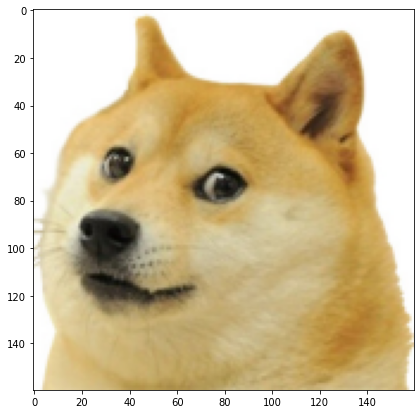

In [14]:
# downsampling rate x5

fig = plt.figure(figsize=(7, 7))

e2_output1 = create_thumbnail(image = e2_img, downsampling_rate = 5)

plt.imshow(e2_output1, vmin = 0, vmax = 255)

plt.savefig('e2_output1.png')

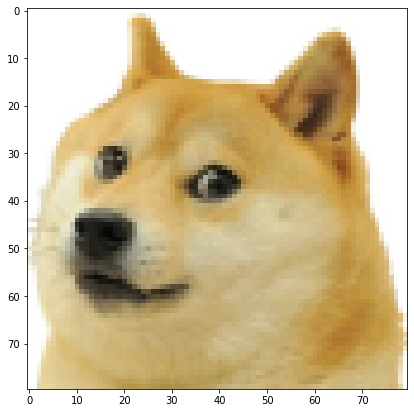

In [15]:
# downsampling rate x10

fig = plt.figure(figsize=(7, 7))

e2_output2 = create_thumbnail(image = e2_img, downsampling_rate = 10)

plt.imshow(e2_output2, vmin = 0, vmax = 255)

plt.savefig('e2_output2.png')

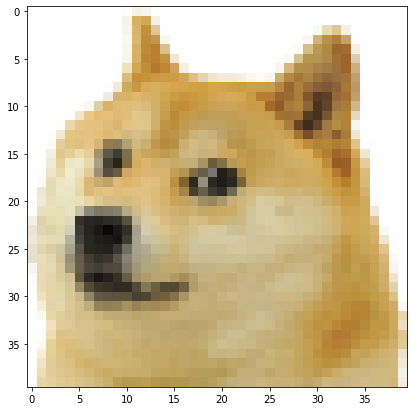

In [16]:
# downsampling rate x20

fig = plt.figure(figsize=(7, 7))

e2_output3 = create_thumbnail(image = e2_img, downsampling_rate = 20)

plt.imshow(e2_output3, vmin = 0, vmax = 255)

plt.savefig('e2_output3.png')

In [17]:
## efficent test
# %timeit -n 100 -r 7 e2_output2 = create_thumbnail(image = e2_img, downsampling_rate = 5)

KeyboardInterrupt: 

### What is the computational complexity of your code? why it is efficient？

The computational complexity of my pooling algorithm is O(kmn) where k,m,n is the shape of image. It is efficient because this algorithm will only go thought 2 times for every pixels. Once to put in the sample matrix and once to calculate the average.